In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

This is programming assignment for week 5. In this assignment you will be solving classification task. 

### Grading
The assignment contains both automatically graded and peer reviewed tasks. 

**Automatic grading**\
After you finish solving all the tasks restart the kernel (`kernel -> restart`) and and click button `Validate` to check that everything works as expected. Afterwards, you can submit your work.



**Peer Review**\
Some of the tasks cannot be checked automatically,  therefore, we'll be using peer review. Please, download this notebook with solutions (`File → Download as → Notebook (.ipynb)`) and submit it for peer review. Each peer reviewed task contains grading instructions. 



## Part 1. Let's train some decision trees. <a class="anchor" id="part1"></a>

In this part, we will do the simplest preprocessig of the dataset and train decision trees. In the task, you are supposed to predict whether income of a person exceeds \$50K/year. The target variable is equal to `1` if a person earns > \$50k/year and `0` otherwise. 

As an evaluation criterion, we will be using $F_1$score. As you know, it is a weighted average of precision and recall. We are not using accuracy, because the dataset is imbalanced. 

In [2]:
train_data = pd.read_csv('https://github.com/mbburova/MDS/raw/main/week5_train.csv')
train_data.head()

,age,workclass,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0.0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0.0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0.0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0.0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0.0


In [3]:
from sklearn.model_selection import train_test_split

tr, val = train_test_split(train_data, test_size=0.4, random_state=42)

y_train = tr.target
y_valid = val.target
X_train = tr.drop(['target'], axis=1)
X_valid = val.drop(['target'], axis=1)

<a class="anchor" id="task1"></a>

---
**Task 1** [1 pt] Create `column_transformer` which has the following steps:
- fills all the missing values 
- encodes all the categorical features using OHE 
- scales numerical features.

P.S. note, that you'll have to import all the required modules yourself.

In [21]:
X_train['education'].value_counts()

education
HS-grad         6259
Some-college    4372
Bachelors       3231
Masters         1003
Assoc-voc        858
11th             715
Assoc-acdm       644
10th             553
7th-8th          387
Prof-school      343
9th              315
12th             258
Doctorate        253
5th-6th          201
1st-4th          116
Preschool         28
Name: count, dtype: int64

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

categorical_cols = X_train.columns[X_train.dtypes == 'object']
ordinal_cols = []
numerical_cols = X_train.columns[X_train.dtypes != 'object']

categ_pip = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
numerical_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

column_transformer = ColumnTransformer([
    ('cat', categ_pip, categorical_cols),
    ('numerical', numerical_pipe, numerical_cols)
])

In [31]:
X_transformed = column_transformer.fit_transform(X_train)
X_transformed.shape

X_transformed = column_transformer.fit_transform(X_train)
assert X_transformed.shape[0] == 19536
assert X_transformed.shape[1] == 104

<a class="anchor" id="task2"></a>

---
**Task 2** [1 pt] Create a function `tree_pipe`, which given a maximal tree depth returns a pipeline with two steps:

1. Column transformer (defined above)
2. DecisionTreeClassfier with the required `max_depth` parameter

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

def tree_pipe(max_depth):
    pipeline = make_pipeline(column_transformer, DecisionTreeClassifier(max_depth=max_depth))
    return pipeline

In [37]:
test_pipe = tree_pipe(1)

test_pipe = tree_pipe(12)
tree = test_pipe.steps[1][1]
assert tree.max_depth == 12

<a class="anchor" id="task3"></a>

---
**Task 3** [Peer Reviewed] Fit decision trees of different depth (from 1 to 100) using the function from the **task 2**. For each depth calculate $F_1$score on the train and validation datasets. Draw a plot, how both scores depend on the maximal tree depth

In [45]:
from sklearn.metrics import f1_score

f1_values_train = []
f1_values_test = []
for i in range(1, 101):
    model = tree_pipe(i).fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_valid)
    f1_values_train.append(f1_score(y_pred_train, y_train)), f1_values_test.append(f1_score(y_pred_test, y_valid))

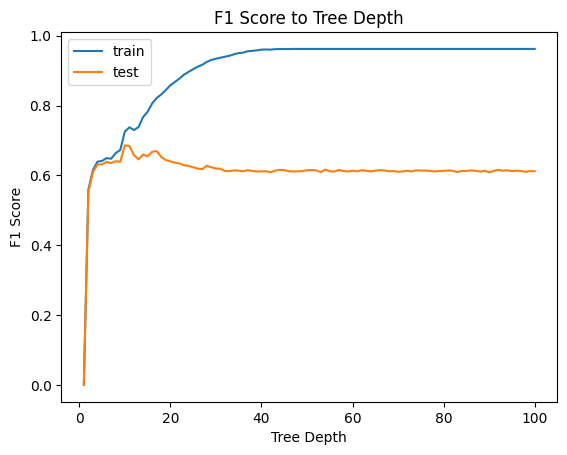

In [49]:
import seaborn as sns

sns.lineplot(x=np.arange(1, 101), y=f1_values_train, label='train')
sns.lineplot(x=np.arange(1, 101), y=f1_values_test, label='test')
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.title('F1 Score to Tree Depth')
plt.legend()

## Part 2. Let's compete. <a class="anchor" id="part2"></a>

In this second part of the assignment your task will be straightforward: achieve the best possible score on the test set. To make everything fair, we will be using [Kaggle competition](https://www.kaggle.com/c/predict-income-group). 

At this stage you are free to use any models or preprocessing methods you want. You can use assignemnts from the previous weeks as an inspiration!

Below you can see how the test dataset can be loaded.  

In [ ]:
test_data = pd.read_csv('https://github.com/mbburova/MDS/raw/main/week5_test.csv')
test_data.head()

In [ ]:
# YOUR PREPROCESSING AND MODELS HERE

In [ ]:
# Do not forget to save your predictions on test and submit them on Kaggle

Below you can see, how `csv` file with the prediction can be created and saved. This file can be later used to upload to Kaggle. Please note, that type of the prediction should be `integer`. 

Even though we do not restrict you a lot in this task, we still ask you to stick to the following steps, which will be graded by your peers

**Peer Review Grading.** Below you will find the list of criteria for peer review:
1. Consider categorical features. Show which feature are categorical, check if all the categories are reasonable. Provide plots.
2. Consider numerical features
3. Fill missing values. 
4. Explore different hyperparameters of the decision trees (not only `max_depth`)
5. Choose the best model using cross-validation or just validation
6. Make a prediction on the test set.
7. Try to make your code readable. Do not forget to leave comments.